# K-Means

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

## Toy Example 直接走一次

### 產生資料

* 我們用內建的 function，來產出一筆模擬資料

In [2]:
# from sklearn.datasets.samples_generator import make_blobs # 舊版寫法，已不能使用
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

In [3]:
# 看資料的維度
print(X.shape)
# 看資料的前五筆
print(X[:5]) 

(300, 2)
[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]


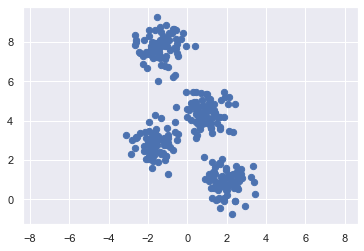

In [4]:
ax = plt.gca()
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', zorder=2);

* 從上面的資料和圖，可以得知我們拿到一組 nxp = 300x2 的資料  
* 在座標系上描出這 300 個點，長得像上圖一樣。
* 直觀來看，分成四群。由於這是模擬資料，所以其實我知道他真的是來自 4 群，而且我還有他們的真實標籤 (`y_true`)

### 概念講解

### code 實作

#### training

In [5]:
# 必要參數，我想分成幾群
num_clusters = 4

# training
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = num_clusters);
kmeans.fit(X);

* 有幾個我們想知道的內容：  
  * 最後得到的那些 centers，座標分別是多少？ -> 用 `kmeans.cluster_centers_` 來查看. 
  * 最後分完全群後，`inertia` (i.e. Total within sum of square) 是多少 -> 用 `kmeans.inertia_` 來查看

In [6]:
# centers 的座標
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

#### 預測 目前/未來 的 instance 屬於哪一群

In [7]:
# prediction
y_kmeans = kmeans.predict(X)

* 可以看到分群結果：

In [8]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

#### 視覺化

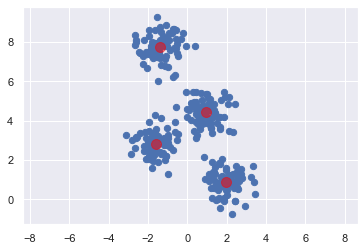

In [9]:
ax = plt.gca()
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

## 細節討論

### 與 效果 有關的討論

#### 分群結果到底好不好？

* 看圖： 
  * 直接畫圖來看，是一定要先做的事 (二維就直接畫圖，多維就先降維再畫圖)
  * 以此例來說，很明顯分的不錯，看起來是 4 群，實際也分成 4 群
* 看量化指標：  
  * 我們可以把 centers 當成是那一群的預測值，然後去算 total square error，就可以知道預測的好不好. 
  * 那這個total square error，其時就是 within group variance. 
  * 而在 kmeans 中，被稱為 `inertia`，我們可以這樣得到結果：

In [57]:
print("inertia(i.e. total square error; within group sum of square): ", kmeans.inertia_)
print("RMSE(i.e. sqrt(inertia/n_points): ", np.sqrt(kmeans.inertia_/X.shape[0]))

inertia(i.e. total square error; within group sum of square):  212.00599621083478
RMSE(i.e. sqrt(inertia/n_points):  0.8406465690384491


* 如果，我們對 domain knowledge 是有 fu 的，那就可以用 mean square error 的角度去解釋這樣算大算小： 平均來說，分完群後，大家離各群的中心有 RMSE 這麼遠

#### 如果分的不好怎麼辦？  

* 有時候分群完一看圖，就覺得分得有點 NG，例如：  

* <span style="color: red"> 那接下來可以做的包括 </span>：  
  * 不是線性可分的資料，改成用非線性的方法(例如 kernel 版 KMeans; 或是本來就是 nonlinear 的分群演算法，如：...)
  * 可能是預設群數設定不佳的問題，可以用xxx來決定群數. 

### 與 EDA 有關的討論

#### 使用 KMeans 有 assumption 嗎？

* KMeans 雖然看起來很簡單好算，又沒有特別假設資料要符合什麼分佈，但其實，他是有假設的，只是沒說而已  
* 延續剛剛的例子，我們把每一群的 center 標出來，然後拿該群離 center 最遠的點和 center 的距離當半徑，可以畫出下圖：

In [138]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', alpha = 0.5, zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.8, zorder=1))

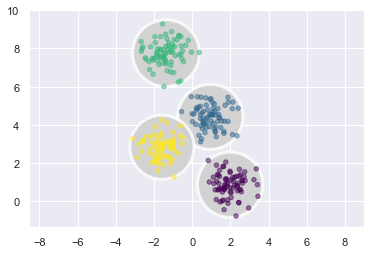

In [139]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

* 從圖中可以看到，在圓內的點，就會被分為該群。  
* 以中間那兩群來說，中間的黃色點，他介於兩群中間，但因為他和黃色的中心，比和藍色的中心近，所以他被歸為黃色那群。那意思就是，在這圈圈內的，都被歸為黃色的群。  
* 所以，把這個圓當 contour 來看，就會是個二元常態，且變異數共變數矩陣必須是對角矩陣，且對角線上的每個 element 都一樣大 (i.e. $\Sigma = c*I$，c 是常數。因為 contour 是正圓，不是斜橢圓，表變異數相等)。
* 所以，KMeans 的假設，可以寫成：  
  * $(X_i | S_i = k) \sim N(\mu_k, \Sigma_k)$: 第 i 筆資料，given 他是第 k 群的話($S_i = k$)，那他會 follow 一個 multivariate normal distribution. 
  * 而且， $\Sigma_k = \lambda_k * I, k = 1,2,...,K$: 意思是，變異數共變數矩陣，不僅是對角矩陣，而且對角線的 element 每個都一樣大  
  * $X_i$ 就是來自 mixture of k 個 Multivariate Normal
* 由此可知，之後會介紹的 Gaussian Mixture Model (GMM)，可以視為 KMeans 的推廣。而 KMeans 只是 GMM 的特例。  
* <span style = "color: red">可以先睹為快</span>： 
  * 如果資料不是分佈的像正圓，而是橢圓的樣子，那 KMeans 會分不好，但 GMM 會分的好  
  * 如果資料分布的就是正圓的樣子，那 GMM 會分的根 KMeans 一樣好

#### Imbalance 的群數可以處理嗎？

* 如果今天有 100 筆資料，而且我們手中握有真實的標籤(2類)，1類有 90 筆，另一類 10 筆，那 KMeans 有辦法幫我分成兩群嗎？

#### 要分成幾群？

* 先畫圖來點直覺. 
  * 例如剛剛的範例，一畫完圖，就知道分成 4 群是好選擇. 
  * 如果今天資料的 feature 大於 2 維，無法直接畫圖，那就先做降維，用 2 維的圖來判斷一下要分成幾群. 
* 畫完圖還看不出來，可以進一步用：  
  * inertia + elbow method  
    * 用迴圈，分成 k 群， k = 1,2,...,K. 
    * 每做一次，就算 inertia，然後看 inertia 在哪裡有拐點. 
  * 輪廓圖：

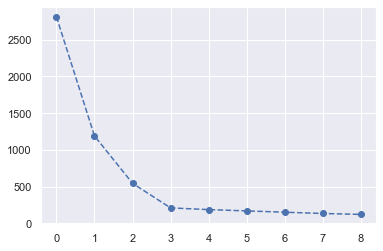

In [12]:
inertia_list = []
for k in range(1, 10):
    try_kmeans = KMeans(n_clusters= k)
    try_kmeans.fit(X)
    inertia_list.append(try_kmeans.inertia_)
plt.plot(inertia_list, '--bo');

* 可以看到，在第 4 個 點的時候，出現 elbow，所以適合用 k = 4 來當群數

* silhouette 的範例如下。算法是：  
  * 每一個 instance，先算出 silhouette score: (b-a) / max(b, a); 
    * a: 此 instance 和自己這群所有點的平均距離： 表示他和自己這群的平均距離 
    * b: 此 instance 與最接近的臨群的平均距離。最接近的臨群的定義，是可以讓 b 最小的群。這個指標可以想成，他距離最能跳槽的群的平均距離
    * 算出來的值介於 -1 ~ 1: 
      * 1 表示 b-a 的值很接近 b 了，表示 b 比 a 大很多，所以表示該 instance 被分的很好，就在自己的群裡
      * 0 表示，此 instance 在 decision boundary 上，因為 b 和 a 幾乎一樣大  
      * -1 表示，此 instance 應該被分到最近的臨群才合理，因為他離最接近臨群更近
  * 把所有 instance 的 silhouette 取平均，得到 silhouette coefficient

In [20]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(k).fit(X) for k in range(2,10)] # 從 k = 2 開始，因為 k = 1 無法算 Silhouette
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

Text(0, 0.5, 'Silhouette score')

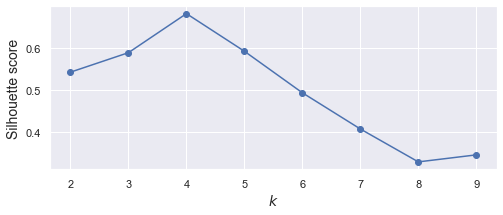

In [21]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
#plt.show()

* 從上圖可知，選 k = 3, 4, 5 都還 ok。訊息量就比 elbow 豐富了。
* 再來，畫個別的輪廓圖 (silhouette diagram)

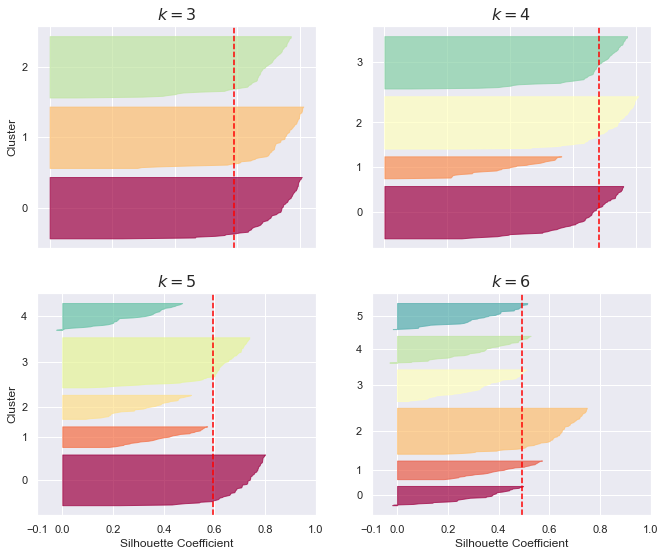

In [22]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
#plt.show()

* 上圖的看法是：
  * 同一群中，從 silhou 由大到小，由上到下排列
  * 所以，刀的高度，表示 instance 的個數 (因為一個 instance 佔據一列)
  * 刀越鈍，越好，刀越鋒利，越不好
  * 紅色虛線是 overall 的平均值，我們希望，所有的刀，大部分都跨過紅線。以上圖來看，3其實就蠻好了。如果希望群內數量少一點(組數多一點)，那 k = 4 就是好選擇
* sklearn 官網也有範例可以看： https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

* <span style="color: red"> 如果用了畫圖，和 elbow method，都還是很難決定群數，那可以考慮：  </span>
  * 用別的指標(e.g. AIC)來取代inertia： 例如改用 Gausian Mixture Model 來分群，他提供的 AIC/BIC 指標也許可以更好的選到 k 要幾群. 
  * 用可以直接幫你找出群數的分群方法：  
    * Baysian 版的 GMM  
    * DBSCAN. 
    * mean-shift. 
    * affinity propagation

#### Outlier 會影響到 KMeans 嗎？

#### 對於非數值形的 feature 如何處理？

#### <span style="color: red">使用 KMeans 前要做前處理嗎？</span>

* 先講結論：  
  * require: Normalization. 
  * optional: PCA
* 由於 KMeans 在算兩點的距離時，就直接把所有 feature 一視同仁的算 Euclidean Distance，所以把大家的單位都調成一樣，是很重要的  
* 如果對每個 feature 做 Normalization，那就等於把變異數共變數矩陣的對角項所有元素設為1(等變異)。此時的 contour 仍不一定是正圓，而是 x, y 方向的 range 一樣大的斜橢圓. 
* 但如果想做到確保 contour 是正圓，那就接著做 PCA (就 de-correlation了)

### 與建模有關的討論

#### 起始值有影響嗎？

* KMeans 在做起始值時，是用隨機撒點的方式(從現有資料中，隨機抽出 k 筆資料當中心). 
* 所以，如果你起始值撒得不好  
* 例如，我們已經知道一組爛起始值如下：

In [48]:
# 已知的爛起始值
rng = np.random.RandomState(0)
i = rng.permutation(X.shape[0])[:num_clusters]
print("起始值是取資料的這 4 個 row: ", i)
print("起始 centers 的座標如下：")
print(X[i])

起始值是取資料的這 4 個 row:  [208 188  12 221]
起始 centers 的座標如下：
[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]


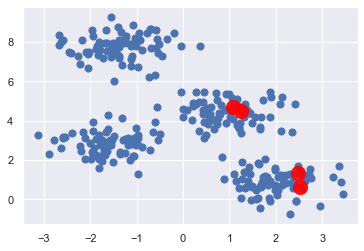

In [52]:
plt.scatter(
    x = X[:, 0], 
    y = X[:, 1], 
    s = 50, 
    cmap='viridis'
)

plt.scatter(X[i][:, 0], X[i][:, 1], c='red', s=200, alpha=0.9);

* 所以，如果一開始起始值取到這組，那結果會很慘：

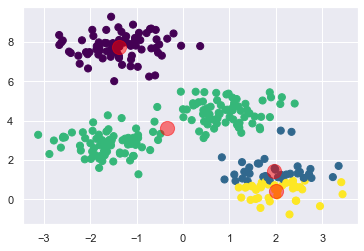

In [67]:
kmeans_bad = KMeans(
    n_init = 1, # 預設是 10
    n_clusters = num_clusters,
    init = X[i] # 給定剛剛那組起始值
)
kmeans_bad.fit(X)
y_pred_bad = kmeans_bad.predict(X)

plt.scatter(
    x = X[:, 0], 
    y = X[:, 1], 
    c = y_pred_bad, 
    s = 50, 
    cmap='viridis'
)

centers_bad = kmeans_bad.cluster_centers_
plt.scatter(centers_bad[:, 0], centers_bad[:, 1], c='red', s=200, alpha=0.5);

* 可以看到，分群結果不理想. 
* 那這部分在實作時，是可以不用太擔心  
* 因為 sklearn 知道 KMeans 有這個缺陷，所以他會. 
  * 預設就先幫你撒 10 組 init (可從 `n_init = 10` 這個參數來做設定). 
  * 每一組 init，就會做一次完整的 KMeans 分群，分完後，得到 inertia. 
  * 只取出 10 組中， inertia 最小的給你，當作結果
* <span style="color: red">選初始值的其他方式: 另一本書的 p237 開始</span>

#### 善用 `?` 可得 function 滿滿細節

In [71]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

#### 如何將 KMeans 變成 nonlinear？

* KMeans 的算法，是算 點 到 center 的距離，所以概念上，他用 "圓形" 的 decision boundary 在分群，只能做到 線性 分群
* 那如果碰到以下經典的 `moon` dataset，用 KMeans 就分不好：

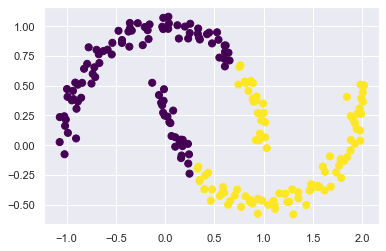

In [72]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

* 可以看到， Kmeans 把他切成左邊和右邊，但...應該要分成上半圓和下半圓  
* 如果想改善的話，有兩條路可以走：  
  * 把資料先投影到高維度，再用 KMeans 對高維資料做分群 (所以，概念上就是 kernel methods, e.g. SVM). 
  * 換方法吧...，xxx方法 可以做到 nonlinear 分群  
* 這邊來試試 kernel 的方法：

/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


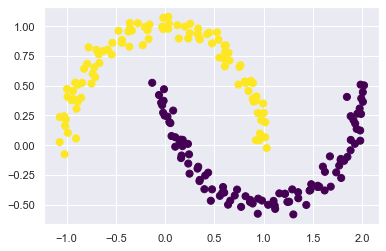

In [73]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(
    n_clusters=2, 
    affinity='nearest_neighbors',
    assign_labels='kmeans'
)

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### KMeans 可以處理 big data 嗎？

* KMeans 在每次 iteration 的時候，都要算組平均. 
* 這意味著，他要一直對 "所有" 的 data 算 mean_vector. 
* 那資料量一多，就會算很慢. 
* 所以解決方法是：  
  * 使用 `batch-based k-means`  
  * 也就是每次迭代時，我只用一個 batch 的資料來更新 mean_vector 就好. 
  * 這邊的做法，可用 `sklearn.cluster.MiniBatchKMeans` 來處理，等等可在<span style="color: red">哪裡看到這個例子</span>

### 與後續應用有關的討論

#### KMeans 可以用在訊號分群嗎？

* <span style="color: red"> 可以 der，舉股票走勢 的例子. </span>

#### KMeans 可以用在影像分群嗎？  

* <span style="color: red">可以 der，舉 number digit 分群的例子 </span>

## 推薦的 workflow

* EDA:  
* 建模:

## Real world examples

### [訊號分群] Stock Movent

* 這個應用蠻好玩的，我們可以對股票的 "走勢" 做分群。
* 資料如以下： 

In [94]:
movements = pd.read_csv("data/company-stock-movements.csv", index_col = 0)
movements.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* 可以看到，每一列是一家公司，每一行是時間點，值是股價(大概做過一些調整了，所以有正有負，我們可以不用管他，就當是股價即可)  
* 我們就取這前 5 家公司，來看看他的走勢圖：

* 如果我今天要做的分群，是對絕對的數值做分群，那我就直接用這張表分群就好. 
* 因為，我去算兩列的 歐式距離，就等於在算兩條訊號的距離有多近。所以，比較近的就被分在同一群裡. 
* 但如果我今天是想對 "走勢" 做分群，那我會希望對 "列" 做標準化。
  * 舉例來說，台積電的股價變化是 600, 580, 600, 620, 640，啟基是 60, 58, 60, 62, 64。
  * 那從 "走勢" 來看，台積跟啟基走勢是一樣的，應該被分為一群，但如果直接做 kmeans，就再見了，因為光 600 和 60 的距離就很遠。  
  * 另外，台積股價的變化是 -20, 20, 20, 20; 啟基是 -2, 2, 2, 2，這個變動差距也不同，但如果改成看變化百分比(把股價放分母，變化當分子)，那兩邊就又差不多了. 
  * 所以，我如果先對列做標準化，那兩個公司的數值就都變成 [-0.39, -1.37, -0.39, 0.58, 1.56]，一模模一樣樣，euclidean distance 變成 0，分群時一定放在一塊兒
* 所以，這一個例子，我們就要對 "列" 做標準化，那就要用到 `Normalizer` 這個 preprocessor:

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()
normalizer.fit(movements)
movements_norm = normalizer.transform(movements)

In [99]:
movements.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* 最後，就可以把 company 做分群，得到以下結果：

In [96]:


# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [97]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 
                   'companies': movements.index})

# Display df sorted by cluster label
df.sort_values(["labels"])

,labels,companies
57,0,Exxon
44,0,Schlumberger
42,0,Royal Dutch Shell
10,0,ConocoPhillips
53,0,Valero Energy
12,0,Chevron
51,1,Texas instruments
31,1,McDonalds
50,1,Taiwan Semiconductor Manufacturing
23,1,IBM


### [影像分群] Number Digits

#### 資料

In [74]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

* 一樣用 Number Digits 的資料，但這次的目標，是不看 y ，只看 x (有64個 feature)，看能不能分成 10 群  

* 先不急著用 KMeans，我們先來看一下資料投影到 2 維時，能不能輕易地看出分成 10 群

* 我們分別把圖投影到(PC1, PC2), (PC2, PC3), (PC1, PC3)，看起來沒有那麼漂亮

In [75]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

* 我們來看看這 10 個 centers 的圖長怎樣：

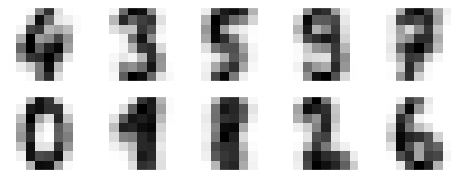

In [76]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* 看來這 10 個群組的中心，都還有模有樣的，但 1 和 8 似乎分不太清楚

* 因為我們其實有答案，所以可以來對個答案看看. 
* 但因為我們現在只知道每張照片被分到某一群，但我不知道這一群是 0~9 的哪個數字，所以我打算用以下方式來給 label:  
  * 對於 第 i 群 的圖片來說，我取出這些圖片的答案 labels. ，再對這些 labels 取眾數，就用眾數來代表這一群. 
  * 舉例來說，左上圖這一群裡面，假設有 1000 張圖片，那如果這 1000 張圖片的眾樹是 4 ，我就把這一群命名為 4
* 結果如下：

In [77]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [84]:
print("各張照片被分到第幾群： ", clusters)
print("該群代表的數字 label: ", labels)

各張照片被分到第幾群：  [5 7 7 ... 7 3 3]
該群代表的數字 label:  [0 8 8 ... 8 9 9]


* 那，接下來就可以對答案了。先看一下準確率：

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

* 並不意外～ 因為從 centers 來看，除了 1 和 8 這兩個數字外，其他看起來都很明顯，所以有 80% 的資料分的很好. 
* 用 confusion matrix 來確認一下：

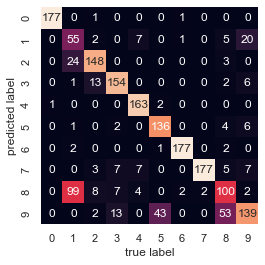

In [79]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

* 1 和 8 最常分錯(不意外)  
* 9 和 5 看來也分的不好  
* 9 和 8 也分的不好

* 我們如果降到 2 維來看原始資料，也可發現這三個數字 overlap 較嚴重. 

* 如果想提升 KMeans 的表現，下一步就是做 kernel KMeans。
* 但我們這邊不想這麼做，我們想試試另一種做法(純屬好玩). 
* 先把資料做 t-SNE，看看做完後是不是資料散得很開，用 KMeans 就能分出來：

In [85]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [87]:
digits_proj.shape

(1797, 2)

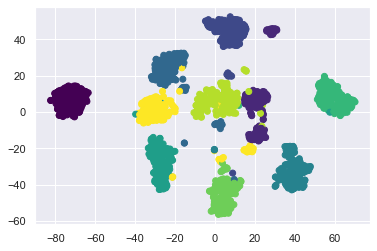

In [89]:
plt.scatter(
    digits_proj[:, 0], 
    digits_proj[:, 1], 
    c=digits.target,
    cmap='viridis'
);

* 看起來各個數字分的很開，而且用圓形就可以一圈一圈的分出來. 
* 那就來看看用 KMeans 可以做多好吧：

In [90]:
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9432387312186978

* 發現 accuracy 可以到 94%  
* 在我不知道 label 的情況下，還可以有這種準確率，讚啦！！
* 但要提醒的是，在實務上，不太能這樣做，因為
  * t-SNE 只能對手上這筆樣本作轉換，未來新資料進來時，我沒辦法把該圖的 64 維，投影到現在看到的 2 維  
  * 所以只能對手邊這組影像做分群，無法對未來的影像做分群

### [影像分群] Olivetti 臉譜分群

In [146]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

print(olivetti.target)
print(olivetti.data.shape)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

* Olivetti 臉譜資料，有 40 個人，每個人都拍 10 張照片，共有 400 張 64x64 的灰階人臉照片。  
* 每張照片都被 flatten 為 4096 維的 1D 向量，
* 每張照片，都已經被 normalize 到 0~1 之間
* 這組資料常被用來作為訓練看照片判斷是誰的人臉. 
* 這邊我們要練習分群，看用 KMeans 分完群後，是不是每一群裡的人臉長的都差不多

In [148]:
# 先用分層隨機抽樣，將資料分成 train, valid, 和 test

from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [149]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


* 先做 PCA，把維度從 4096 維降下來 (這一步，就和 auto-encoder要取 feature 一樣)

In [150]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

* 可以看到，4096維被降到199維. 
* 接下來，做 KMeans

In [151]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


* 接著，用 silhouette_score 來選最佳群數. 

120


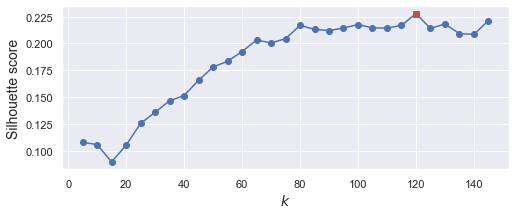

In [155]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

print(best_k)

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs");

* 可以看到，最佳的群數，是分成 120 群  
* 如果用 Inertia 來分，看得更不清楚

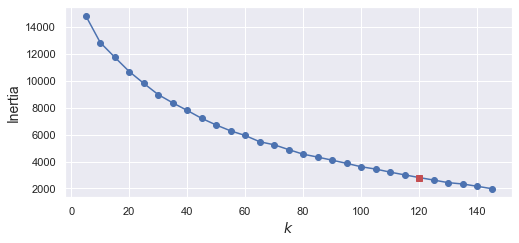

In [156]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")

* 雖然最後分成 120 群，不是我們預想的 40 群 (因為有 40 個人)，但這也正常，因為同一個人，可能在不同張照片看起來不同(e.g. 有時候有戴眼鏡，有時沒戴，或是照片有左或右的shift)
* 我們 keep 這個分群 model，並看看群內的照片是不是都很像

In [157]:
best_model = kmeans_per_k[best_index]

Cluster 0


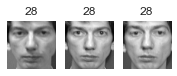

Cluster 1


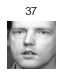

Cluster 2


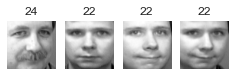

Cluster 3


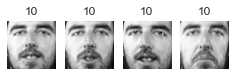

Cluster 4


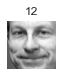

Cluster 5


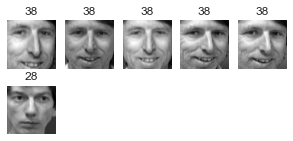

Cluster 6


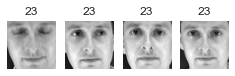

Cluster 7


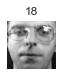

Cluster 8


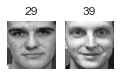

Cluster 9


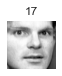

Cluster 10


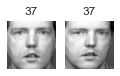

Cluster 11


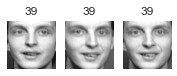

Cluster 12


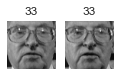

Cluster 13


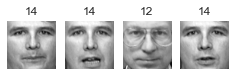

Cluster 14


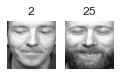

Cluster 15


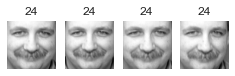

Cluster 16


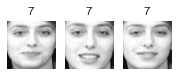

Cluster 17


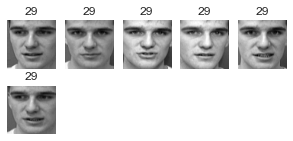

Cluster 18


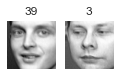

Cluster 19


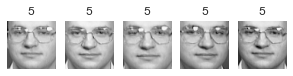

Cluster 20


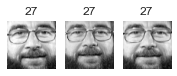

Cluster 21


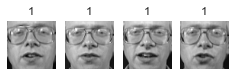

Cluster 22


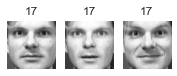

Cluster 23


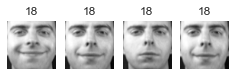

Cluster 24


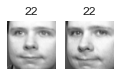

Cluster 25


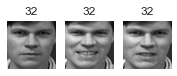

Cluster 26


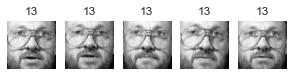

Cluster 27


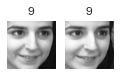

Cluster 28


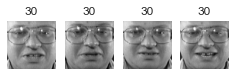

Cluster 29


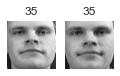

Cluster 30


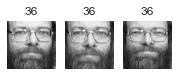

Cluster 31


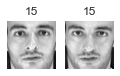

Cluster 32


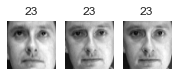

Cluster 33


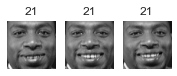

Cluster 34


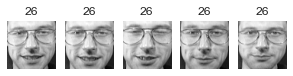

Cluster 35


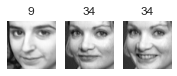

Cluster 36


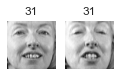

Cluster 37


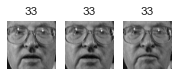

Cluster 38


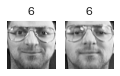

Cluster 39


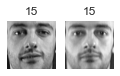

Cluster 40


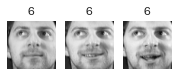

Cluster 41


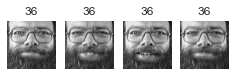

Cluster 42


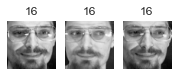

Cluster 43


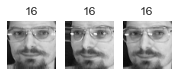

Cluster 44


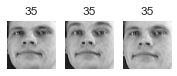

Cluster 45


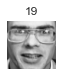

Cluster 46


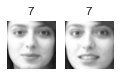

Cluster 47


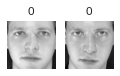

Cluster 48


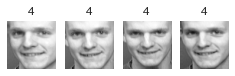

Cluster 49


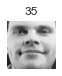

Cluster 50


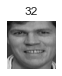

Cluster 51


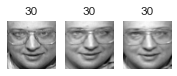

Cluster 52


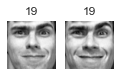

Cluster 53


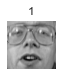

Cluster 54


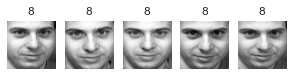

Cluster 55


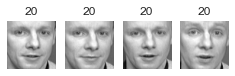

Cluster 56


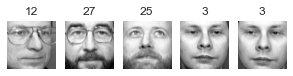

Cluster 57


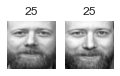

Cluster 58


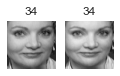

Cluster 59


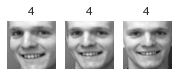

Cluster 60


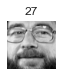

Cluster 61


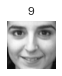

Cluster 62


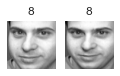

Cluster 63


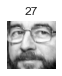

Cluster 64


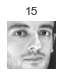

Cluster 65


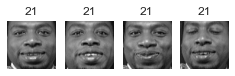

Cluster 66


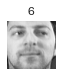

Cluster 67


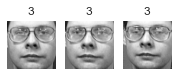

Cluster 68


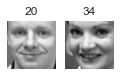

Cluster 69


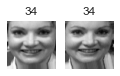

Cluster 70


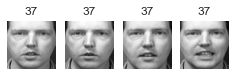

Cluster 71


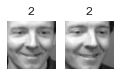

Cluster 72


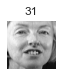

Cluster 73


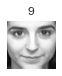

Cluster 74


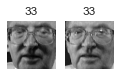

Cluster 75


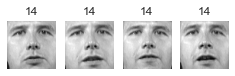

Cluster 76


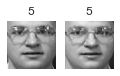

Cluster 77


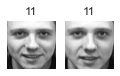

Cluster 78


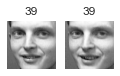

Cluster 79


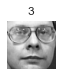

Cluster 80


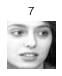

Cluster 81


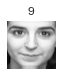

Cluster 82


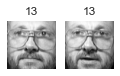

Cluster 83


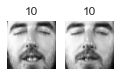

Cluster 84


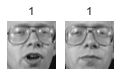

Cluster 85


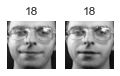

Cluster 86


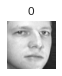

Cluster 87


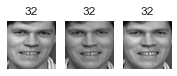

Cluster 88


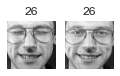

Cluster 89


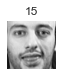

Cluster 90


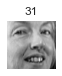

Cluster 91


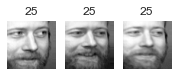

Cluster 92


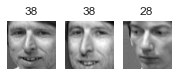

Cluster 93


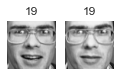

Cluster 94


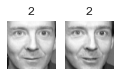

Cluster 95


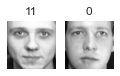

Cluster 96


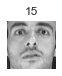

Cluster 97


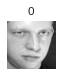

Cluster 98


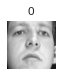

Cluster 99


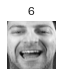

Cluster 100


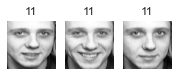

Cluster 101


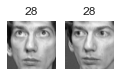

Cluster 102


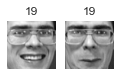

Cluster 103


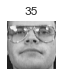

Cluster 104


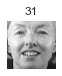

Cluster 105


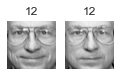

Cluster 106


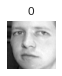

Cluster 107


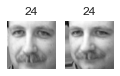

Cluster 108


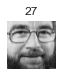

Cluster 109


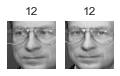

Cluster 110


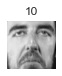

Cluster 111


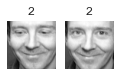

Cluster 112


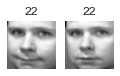

Cluster 113


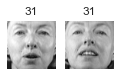

Cluster 114


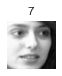

Cluster 115


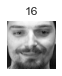

Cluster 116


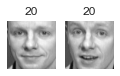

Cluster 117


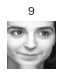

Cluster 118


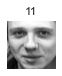

Cluster 119


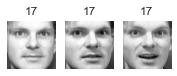

In [158]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

* 大概有 2/3 的 cluster 是有用的： 因為至少包含兩張同一個人的照片。  
* 大概有 1/2 的 cluster，不是只有一張照片，就是混雜多個人，就沒那麼有用了. 
* 像這樣把照片分群，雖然很不準確，但他最大的用處是幫我們加速 labeling。有了這個基礎後再去 label 是可以變快很多的。

### [影像分類前處理] Olivetti

* 延續剛剛，如果我們把它改成分類問題。然後，拿 KMeans 分群後的結果，當新的 feature，看看效果如何
* 先 train 一個 randomforest 的分類器 (feature 一樣用 PCA 降下來的 199 維當 feature

In [159]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

* 預測準確率有 92.5%  
* 接下來，用分群結果當 feature，看結果會不會比較好

In [169]:
X_train_extended = np.c_[X_train_pca, best_model.predict(X_train_pca)]
X_valid_extended = np.c_[X_valid_pca, best_model.predict(X_valid_pca)]
X_test_extended = np.c_[X_test_pca, best_model.predict(X_test_pca)]

In [170]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.9375

* 有些微提升了. 

### [影像半監督學習] Number Digits

### [影像分割] 